<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/Lecture09_Solving_BVPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving Boundary Value Problems**

### **Notes**❕
This content forms a part of the instructional presentations for the **`numerical methods in chemical engineering`** course designed for undergraduate chemical engineering students at Amirkabir University of Technology.

Feel free to utilize the information and source codes provided in this material, ensuring appropriate acknowledgment of the original document.

The visual elements featured in this document have been sourced from the following sources, unless specified otherwise:

* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).


<div align="center">
🟪 🟪 🟪
</dive>

---

# 🔵 1) What is a boundary value problem (ODE)?
* In general form, it is:
$$
\frac{d^2y}{dx^2} = f(x,y,\frac{dy}{dx})
\tag{1-1}
$$
* where $x$ is independent variable $a\le x\le b$ and $y$ is dependent variable.
* The counditions for solving this ODE are defined at $a$ and $b$. It can be a combination of the following:
 * **Dirichlet** boundary condition (constant value):
  $$ y(a) = Y_a \ \ \text{or} \ \ \ y(b) = Y_b \tag{1-2}$$
   in a heat transfer problem, it is called constant temperature condition.

 * **Neumann** boundary condition (constant flux):
 $$
 \frac{dy}{dx}|_{x=a} = D_a  \ \ \text{or} \ \ \ \frac{dy}{dx}|_{x=b} = D_b \tag{1-3}
 $$
  in a heat transfer problem, it can be used for isolation or constant heat flux condition.
 * **Mixed** boundary condition:
 $$
 c_1\frac{dy}{dx}|_{x=a} + c_2y(a) = C_a \ \text{or} \\
 c_3\frac{dy}{dx}|_{x=b} + c_4y(b) = C_b \tag{1-4}
 $$
 in a heat transfer problem, it is used when a solid surface has convective heat trasnfer with a fluid.



<div align="center">
🟦 🟦 🟦
</div>


---



# 2) Shooting method

* Consider the following problem:
$$
\frac{d^2y}{dx^2} = f(x,y,\frac{dy}{dx}) \ \ \ \text{with} \ \ y(a)=Y_a, \ \ y(b) = Y_b
$$
* **Step1** (transforming to canonical form): We can convert this equation into two first-order differntial equations using the change of variables:
$$
\begin{cases}
\frac{dy}{dx} = w & y(a) = Y_a \\
\frac{dw}{dx} = f(x,y,w) & \text{no initial condition for }w
\end{cases}
$$
* **Step2** (first guess/estimate):  Solve until you get a solution at $x = b$, and you obtain $y_{b1}$, then compare.
$$
w(a) = W_1
$$
* **Step3** (second guess/estimate): Solve until you get a solution at $x=b$, and you obtain $y_{b2}$, then compare.
$$
w(a) = W_2
$$
* **Step4:** estimate a new value for w(a) based on two previous estimates:
$$
W_{new} = W_1+(Y_b - y_{b1})\frac{W_2-W_1}{y_{b2}-y_{b1}}
$$
* **Step5:** solve again upto $x=b$ to obtain $y_{b3}$ and compare:
 * $\epsilon_a = |\frac{y_{b3}-Y_b}{Y_b}|$
 * if $\epsilon_a < tol ⇒$ **finished**.
 * otherwise, switch the third guess with either of the first or second guess and goto **step4**.


<div align="center">
<img src="https://drive.google.com/uc?id=1tkn4PIOyx0t_69IcbB2C1P9_jRyX3dYI" width="500">
</div>

### ❓ **Example 1:**
Solve this equation using shooting method.

$$
\frac{d^2T}{dx^2} + 0.05(200-T)=0  \\
T(0) = 300 K  \\
T(10) = 400 K
$$

<div align="center">
<img src="https://drive.google.com/uc?id=1mcIVusDQgJNdNPTEzIokMp-oMlf1-6cS" width="500">
</div>

💡 *Solution*

**Step1** (transforming to canonical form)
$$
\begin{cases}
\frac{dT}{dx} = z & T(0) = 300 \\
\frac{dz}{dx} = -0.05(200-T) & ❔
\end{cases}
$$
**Step2** (first guess)
$$
Z_1 = -5 ⇒ T_{b1} = 569.754
$$
**Step3** (second guess)
$$
Z_2 = -20 ⇒ T_{b2} = 259.513
$$
**Step4&5** (new estimate)
$$
Z_{new} = -5 + \frac{-20 -(-5)}{259.513 - 569.75}(400 - 569.75) = -13.2075
$$

&nbsp;

Solving with this new $Z(0) = -13.2075$ will give $T(10) = 400.000777$.
We found the solution!

In [13]:
import scipy.integrate as Int

def odeSystemExp1(t, y):
  T , z = y
  return [z, -0.05*(200-T)]

z_geuss = -13.2075;
sol = Int.solve_ivp(odeSystemExp1, [0,10], [300, z_geuss],rtol=1.0e-5)
print("T at x = 10 is :", sol.y[0,-1])

T at x = 10 is : 400.00077670448013


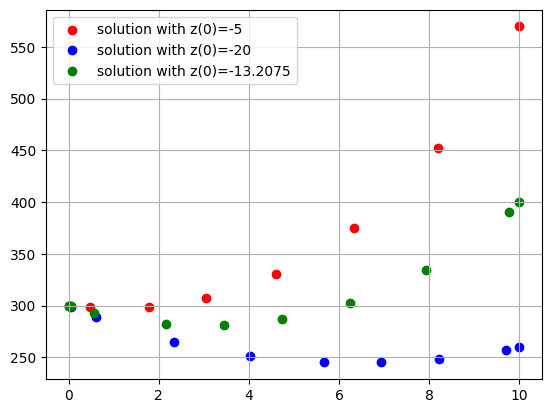

In [19]:
import scipy.integrate as Int
import matplotlib.pyplot as plt

sol1 = Int.solve_ivp(odeSystemExp1, [0,10], [300, -5],rtol=1.0e-5)
sol2 = Int.solve_ivp(odeSystemExp1, [0,10], [300, -20],rtol=1.0e-5)
sol3 = Int.solve_ivp(odeSystemExp1, [0,10], [300, -13.2075],rtol=1.0e-5)

plt.scatter(sol1.t, sol1.y[0,:], c='r')
plt.scatter(sol2.t, sol2.y[0,:], c='b')
plt.scatter(sol3.t, sol3.y[0,:], c='g')
plt.legend(["solution with z(0)=-5",
           "solution with z(0)=-20",
           "solution with z(0)=-13.2075"])
plt.grid(True)
plt.show()

### ❓ **Example 2:**
Solve this equation using shooting method.

$$
\frac{d^2T}{dx^2} + 0.05(200-T)=0  \\
\frac{dT}{dx}(0) = \frac{1}{200}(T(0)-200)    \\
T(10) = 400 K
$$

<div align="center">
<img src="https://drive.google.com/uc?id=1EfSF7gOP8lnCiRJ6pDxsE-TK2TGMwLWs" width="500">
</div>

💡 *Solution*

**Step1** (transforming to canonical form)
$$
\begin{cases}
\frac{dT}{dx} = z & ❔ \\
\frac{dz}{dx} = -0.05(200-T) & z(0) = \frac{1}{200}(T(0)-200)
\end{cases}
$$

**Step2** (first guess): the guess for T at $x = 0$
$$
T_1 = 300 ⇒ z(0) = \frac{1}{200}(300-200) = 0.5
$$
If we integrate the above equations up to $x=10$ we will get $T(10) = T_{b1} = 683.51$.

**Step3** (second guess): the guess for T at $x=0$:
$$
T_2 = 250 ⇒ z(0) = \frac{1}{200}(250-200) = 0.25
$$
If we integrate the above equations up to $x=10$ we will get $T(10) = T_{b2} = 441.75$.

**Step4&5** (new estimate):
$$
T_{new} = 300 + \frac{250-300}{441.75-683.51}(400 - 683.51) = 241.365
$$
Solving with new $T(0) = 241.365$ upto x=10, we get $T(10) = 400.0038$.
This is close enough to 400, so we stop the solution here.

In [26]:
import scipy.integrate as Int

def odeSystemExp1(t, y):
  T , z = y
  return [z, -0.05*(200-T)]

T_guess = 241.365;
z_0 = 1.0/200.0*(T_guess - 200)
sol = Int.solve_ivp(odeSystemExp1, [0,10], [T_guess, z_0],rtol=1.0e-5)
print("T at x = 10 is :", sol.y[0,-1])

T at x = 10 is : 400.00385678339063


# 3) Finite difference method ODE (BVP)
* Conside an ODE with boundary conditions that holds in $a\le x \le b$.
* We divide this domain in equally-spaced intervals. These intervals are separated by $Δx$ and the ends are repesented by nodes.
* Since the ODE holds on every point in domain, it also hold on nodes.
* We use finite difference approximations for estimating the derivatives.

* For example consider the 1D heat equation in a rod.
$$
\frac{d^2T}{dx^2} + 0.05(200-T)=0  \\
T(0) = 300 K  \\
T(10) = 400 K
\tag{3-1}
$$
* We divide $x$ length  into $n$ intervals:
 * We will have $n+1$ nodes
 * Temperatures at the first node and the last node are are known (boundary conditions)
 * Temperatures at $n-1$ nodes are unknown.  
<div align="center">
<img src="https://drive.google.com/uc?id=1dj-Rflc9y3i9lqPgfb_I_Wwqm0Fhu5Ea" width="500">
</div>



* We use finite difference formulas for evaluating the derivatives for node $i$:
$$
\frac{d^2T}{dx^2} ≃ \frac{T_{i+1}-2T_i+T_{i-1}}{Δx^2}
\tag{3-2}
$$

* This is substituted into the ODE and we get:
$$
\frac{T_{i+1}-2T_i+T_{i-1}}{Δx^2} + 0.05(200-T_i)=0
\tag{3-3}
$$
* re-arranging the above equation will give:
$$
-T_{i-1} +(2+0.05Δx^2)T_i - T_{i+1} = 10 Δx^2
\tag{3-4}
$$
* We can write the above equation for n-1 internal nodes and this is equal to the number of unknown temperatures.
* The above equation forms a set of linear equations whose solution will give the temperature distribution in the rod.

### ❓ **Example 3:**

Solve the following equation using finite difference method with $\Delta x = 2 \ m$.
$$
\frac{d^2T}{dx^2} + 0.05(200-T)=0  \\
T(0) = 300 K  \\
T(10) = 400 K
$$


💡 *Solution*

Since $Δx = 2$, we have 6 nodes, indexed by $i=0,1, ...,5$.

Nodes 0 and 5 are boundary nodes and their temperatures are known by boundary conditions.
$$
T_0 = 300 \\
T_5 = 400
$$

using Eq. (3-4) and setting $Δx = 2$, we get:
$$
-T_{i-1} +2.2T_i - T_{i+1} = 40
$$

* For $i=1$:
$$
-T_0 + 2.2T_1-T_2 = 40 ⇒ 2.2T_1-T_2 = 340
$$
* For $i=4$:
$$
-T_3 + 2.2T_4-T_5 = 40 ⇒ -T_3 + 2.2T_4 = 440
$$

* For the rest of nodes:
$$
i = 2 ⇒ -T_1 +2.2T_2 - T_3 = 40   \\
i = 3 ⇒ -T_2 +2.2T_3 - T_4 = 40
$$



* The above equations form a set that should be solved.
$$
\begin{bmatrix}
 2.2 & -1 & 0 & 0 \\
 -1  & 2.2& -1& 0 \\
 0 & -1 & 2.2 & -1 \\
 0 & 0 & -1 & 2.2
\end{bmatrix}
\begin{bmatrix}
T_1 \\ T_2 \\ T_3 \\ T_4
\end{bmatrix}
=
\begin{bmatrix}
340 \\ 40 \\ 40\\ 440
\end{bmatrix}
$$
The solution of the above set is:
$$
T =
\begin{bmatrix}
283.2660 \\
283.1853 \\
299.7416 \\
336.2462
\end{bmatrix}
$$

